In [1]:
# Libraries
import numpy as np
import pandas as pd
import warnings

# Viz
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# Stats
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import norm

# ML
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler 

from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report 

In [2]:
# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

In [3]:
data = pd.read_csv('king_ country_ houses_aa.csv')
data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# Copy dataframe
df = data.copy()

In [5]:
# DATA CLEANING
df['date_format'] = pd.to_datetime(df['date'], format ='%Y%m%dT%H%M%S') # convert to date format  
df.insert(0, 'date_format', df.pop('date_format')) # locate date column in the front


# Drop columns
df.drop(columns=['id'],inplace=True)
df.drop(columns=['date'],inplace=True)

# Set it as index
df.set_index('date_format', inplace=True)

In [6]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
df.shape

(21613, 19)

## Features

In [7]:
# Target Variables
col_to_drop = ['sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_renovated', 'sqft_lot15']
df1 = df.drop(columns=col_to_drop)

In [ ]:
col_drop = ['lat', 'long']
df2 = df1.drop(columns=col_drop)

In [23]:
col_drop2 = ['sqft_living', 'sqft_above']
df3 = df1.drop(columns=col_drop2)

In [95]:
# Dealing with outliers
def outliers_dealing(df): 
    """
    Automatically removes outliers based on Q1, Q3
    """
    for column in df.select_dtypes(include=[np.number]):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [7]:
# All columns

df.shape

(21613, 19)

In [8]:
# Selected columns
df1.shape

(21613, 11)

<h2 style="color: Blue;">Modelling</h2>

In [24]:
#X-y split
X = df3.drop("price", axis=1)
y = df3["price"]

#Train_Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
print(f'100% of our data: {len(df2)}.')
print(f'80% for training data: {len(X_train)}.')
print(f'20% for test data: {len(X_test)}.')

100% of our data: 21613.
80% for training data: 17290.
20% for test data: 4323.


In [25]:
df3.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_basement', 'yr_built',
       'zipcode', 'lat', 'long', 'sqft_living15'],
      dtype='object')

<h3 style="color: Blue;">Linear Regression</h3>

In [27]:
# Train the model
model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [28]:
#Model validation
# Make predictions on the test dataset
predictions = model.predict(X_test)

In [29]:
#Metric
r2_3 = r2_score(y_test, predictions)
RMSE_3 = mean_squared_error(y_test, predictions, squared=False)
MSE_3 = mean_squared_error(y_test, predictions)
MAE_3 = mean_absolute_error(y_test, predictions)

#Printing the results
print("R2 = ", round(r2_3, 4))
print("RMSE = ", round(RMSE_3, 4))
print("MSE =  ", round(MSE_3, 4)) 
print("MAE = ", round(MAE_3, 4))

R2 =  0.5268
RMSE =  267454.1528
MSE =   71531723826.7061
MAE =  159405.7651


In [22]:
# Make a dataframe to compare
eval_df = pd.DataFrame({"actual":y_test,"predictions":predictions})
eval_df

,actual,predictions
date_format,,
2014-10-06,365000.0,4.612099e+05
2014-08-21,865000.0,7.524435e+05
2014-08-15,1038000.0,1.238490e+06
2015-03-31,1490000.0,1.662424e+06
2014-07-14,711000.0,7.348896e+05
...,...,...
2014-11-10,338000.0,4.764350e+05
2014-07-08,673000.0,6.149014e+05
2014-10-16,285000.0,4.231015e+05


In [23]:
# Difference 
eval_df["difference"] = abs(eval_df["actual"]-eval_df["predictions"])
eval_df.head()

,actual,predictions,difference
date_format,,,
2014-10-06,365000.0,4.612099e+05,96209.946959
2014-08-21,865000.0,7.524435e+05,112556.489931
2014-08-15,1038000.0,1.238490e+06,200489.802058
2015-03-31,1490000.0,1.662424e+06,172423.823320
2014-07-14,711000.0,7.348896e+05,23889.595770


<h3 style="color: Blue;">Normalization with StandardScaler</h3>

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
model.fit(X_train_scaled, y_train)
predictions2 = model.predict(X_test_scaled)

In [33]:
#Metric
r2_3 = r2_score(y_test, predictions2)
RMSE_3 = mean_squared_error(y_test, predictions2, squared=False)
MSE_3 = mean_squared_error(y_test, predictions2)
MAE_3 = mean_absolute_error(y_test, predictions2)

#Printing the results
print("R2 = ", round(r2_3, 4))
print("RMSE = ", round(RMSE_3, 4))
print("MSE =  ", round(MSE_3, 4)) 
print("MAE = ", round(MAE_3, 4))

R2 =  0.5268
RMSE =  267454.1528
MSE =   71531723826.7057
MAE =  159405.7651


<h3 style="color: Blue;">Normalization with Log Transform</h3>

In [34]:
X_test = X_test.drop(columns='long')
X_train = X_train.drop(columns='long')


In [35]:
# Drop bc they have NaNs (due to negative values)
X_train_log = X_train_log.drop(columns='long') 
X_test_log = X_test_log.drop(columns='long')

NameError: name 'X_train_log' is not defined

In [36]:
#Normalization with log Transform
X_train_log = np.log1p(X_train)  # np.log1p is useful to handle zero values in your data
X_test_log = np.log1p(X_test)

In [37]:
model.fit(X_train_log, y_train)
predictions3 = model.predict(X_test_log)

In [38]:
#Metric
r2_3 = r2_score(y_test, predictions3)
RMSE_3 = mean_squared_error(y_test, predictions3, squared=False)
MSE_3 = mean_squared_error(y_test, predictions3)
MAE_3 = mean_absolute_error(y_test, predictions3)

#Printing the results
print("R2 = ", round(r2_3, 4))
print("RMSE = ", round(RMSE_3, 4))
print("MSE =  ", round(MSE_3, 4)) 
print("MAE = ", round(MAE_3, 4))

R2 =  0.4476
RMSE =  288972.1448
MSE =   83504900497.4123
MAE =  169414.7212


In [25]:
df1.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15'],
      dtype='object')

<h3 style="color: Blue;">Min_Max Scaler</h3>

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
min_max_scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
model.fit(X_train_scaled, y_train) 
pred = model.predict(X_test_scaled)

In [41]:
#Metric
r2_3 = r2_score(y_test, pred)
RMSE_3 = mean_squared_error(y_test, pred, squared=False)
MSE_3 = mean_squared_error(y_test, pred)
MAE_3 = mean_absolute_error(y_test, pred)

#Printing the results
print("R2 = ", round(r2_3, 4))
print("RMSE = ", round(RMSE_3, 4))
print("MSE =  ", round(MSE_3, 4)) 
print("MAE = ", round(MAE_3, 4))

R2 =  0.5168
RMSE =  270264.8078
MSE =   73043066352.563
MAE =  160567.9186


<h3 style="color: Blue;">Multicollinearity</h3>

In [21]:
## Improving by dropping multicollinearity
df3.corrwith(df3["price"]).sort_values(ascending=False)

price            1.000000
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
yr_built         0.054012
long             0.021626
zipcode         -0.053203
dtype: float64

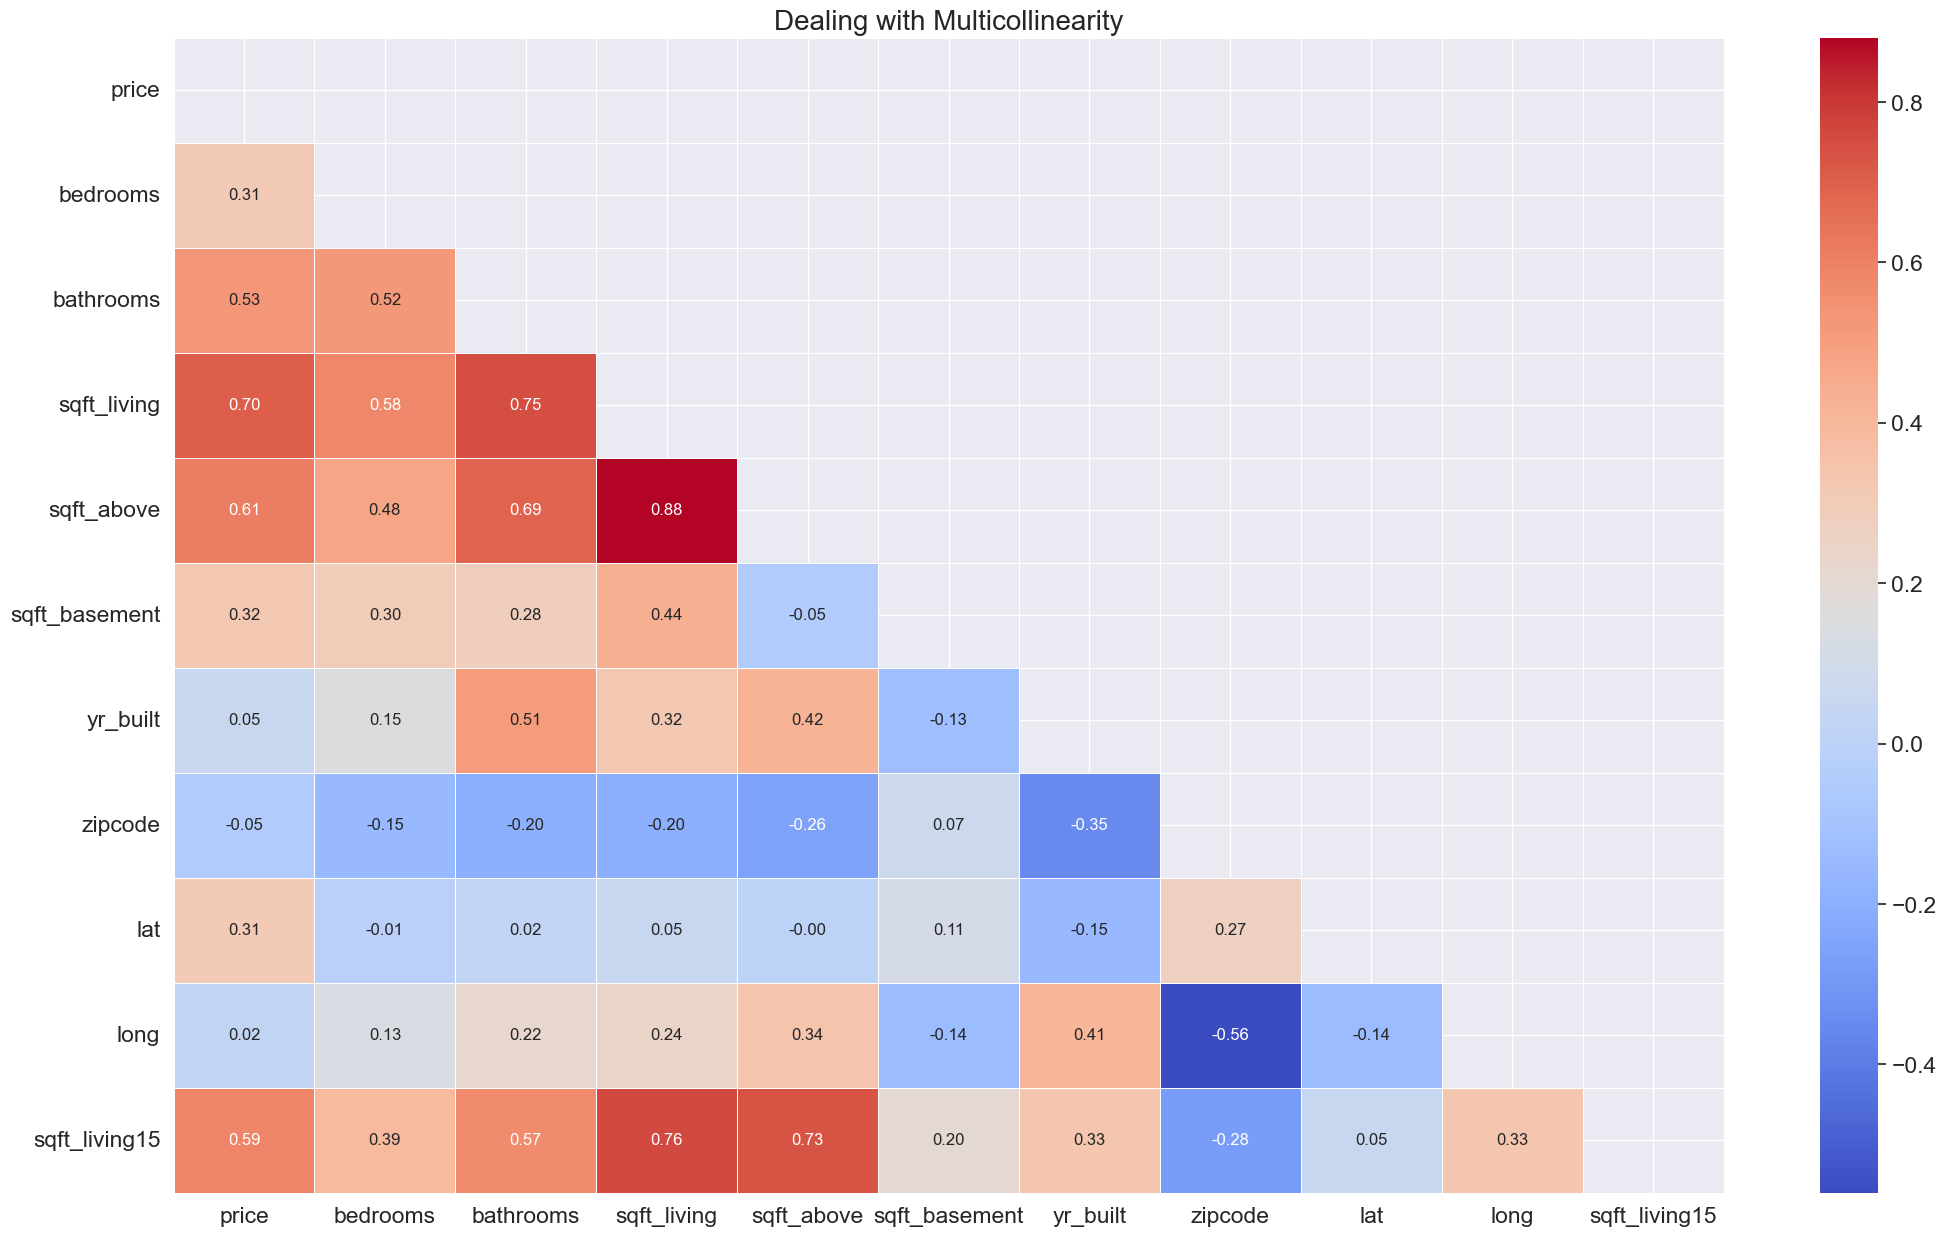

In [55]:
# Checking Multicollinearity
num_corr = round(df1.corr(), 2)

# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

In [43]:
# Dealing with outliers
def outliers_dealing_target(df, target_column): 
    """
    Automatically removes outliers based on Q1, Q3
    Excludes the target column
    """
    for column in df.select_dtypes(include=[np.number]):
        if column == target_column: #skip the target column
            continue
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [44]:
df_no_outliers = outliers_dealing_target(df3, target_column='price')

In [48]:
# Shape of cleaned data
print("Original Data Shape:", df.shape)
print("Cleaned Data Shape:", df_no_outliers.shape)

Original Data Shape: (21613, 19)
Cleaned Data Shape: (19222, 9)


<h3 style="color: Blue;">Training with data with no outliers</h3>

In [45]:
# Split the cleaned_data into features (X) and target (y)
X = df_no_outliers.drop(columns=['price'])  
y = df_no_outliers['price'] 

# Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Train the model
model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [47]:
# Make predictions on the test dataset
predictions4 = model.predict(X_test)

In [48]:
#Metric
r2_3 = r2_score(y_test, predictions4)
RMSE_3 = mean_squared_error(y_test, predictions4, squared=False)
MSE_3 = mean_squared_error(y_test, predictions4)
MAE_3 = mean_absolute_error(y_test, predictions4)

#Printing the results
print("R2 = ", round(r2_3, 4))
print("RMSE = ", round(RMSE_3, 4))
print("MSE =  ", round(MSE_3, 4)) 
print("MAE = ", round(MAE_3, 4))

R2 =  0.496
RMSE =  188674.1819
MSE =   35597946924.8799
MAE =  126032.0464


In [49]:
linear_regression_results = [
    {'Scenario': 'df',
    "R²": 0.7012,
    "RMSE": 212539.5166,
    "MSE": 45173046132.7876,
    "MAE": 127493.3421
},
{'Scenario': 'df1',
    "R²": 0.62,
    "RMSE": 239674.4929,
    "MSE": 57443862523.1292,
    "MAE": 145832.3577
},
{'Scenario': 'df2',
    "R²": 0.5564,
    "RMSE": 258961.4508,
    "MSE": 67061032982.6223,
    "MAE": 163929.5026
},
{'Scenario': 'df3',
    "R²": 0.5268,
    "RMSE": 267454.1528,
    "MSE": 71531723826.7061,
    "MAE": 159405.7651
},
{'Scenario': 'df with standardscaler',
    "R²": 0.7012,
    "RMSE": 212539.5166,
    "MSE": 45173046132.7902,
    "MAE": 127493.3421
},
{'Scenario': 'df1 with standardscaler',
    "R²": 0.6191,
    "RMSE": 234502.6095,
    "MSE": 54991473878.4214,
    "MAE": 144577.0883
},
{'Scenario': 'df2 with standardscaler',
    "R²": 0.5564,
    "RMSE": 234502.6095,
    "MSE": 54991473878.4214,
    "MAE": 144577.0883
},
{'Scenario': 'df3 with standardscaler',
    "R²": 0.5268,
    "RMSE": 267454.1528,
    "MSE": 71531723826.7057,
    "MAE": 159405.7651
},
{'Scenario': 'df with Log Transform',
    "R²": 0.6346,
    "RMSE": 235041.0657,
    "MSE": 55244302564.1398,
    "MAE": 136175.8431
},
{'Scenario': 'df1 with Log Transform',
    "R²": 0.5204,
    "RMSE": 269279.1889,
    "MSE": 72511281548.3856,
    "MAE": 158101.5975
},
{'Scenario': 'df2 with Log Transform',
    "R²": 0.4685,
    "RMSE": 283453.6944,
    "MSE": 80345996890.5327,
    "MAE": 174470.6309
},
{'Scenario': 'df3 with Log Transform',
    "R²": 0.4476,
    "RMSE": 288972.1448,
    "MSE": 83504900497.4123,
    "MAE": 169414.7212
},
{'Scenario': 'df with min_max Scaler',
    "R²": 0.7012,
    "RMSE": 212539.5166,
    "MSE": 45173046132.7902,
    "MAE": 127493.3421
},
{'Scenario': 'df1 with min_max Scaler',
    "R²": 0.62,
    "RMSE": 239674.4929,
    "MSE": 57443862523.1293,
    "MAE": 145832.3577
},
{'Scenario': 'df2 with min_max Scaler',
    "R²": 0.5564,
    "RMSE": 258961.4508,
    "MSE": 67061032982.6222,
    "MAE": 163929.5026
},
{'Scenario': 'df3 with min_max Scaler',
    "R²": 0.5168,
    "RMSE": 270264.8078,
    "MSE": 73043066352.563,
    "MAE": 160567.9186
},
{'Scenario': 'df without outliers',
    "R²": 0.6303,
    "RMSE": 119640.5001,
    "MSE": 14313849254.1552,
    "MAE": 84813.9951
},
{'Scenario': 'df1 without outliers',
    "R²": 0.5715,
    "RMSE": 151454.9535,
    "MSE": 22938602952.8948,
    "MAE": 108102.4456
},
{'Scenario': 'df2 without ouliers',
    "R²": 0.4233,
    "RMSE": 183733.4996,
    "MSE": 33757998858.0635,
    "MAE": 134566.9705
},
{'Scenario': 'df3 without ouliers',
    "R²": 0.496,
    "RMSE": 188674.1819,
    "MSE": 35597946924.8799,
    "MAE": 126032.0464
}]

LG_results_df = pd.DataFrame(linear_regression_results)

LG_results_df.set_index('Scenario', inplace=True)

In [12]:
df2.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'sqft_living15'],
      dtype='object')

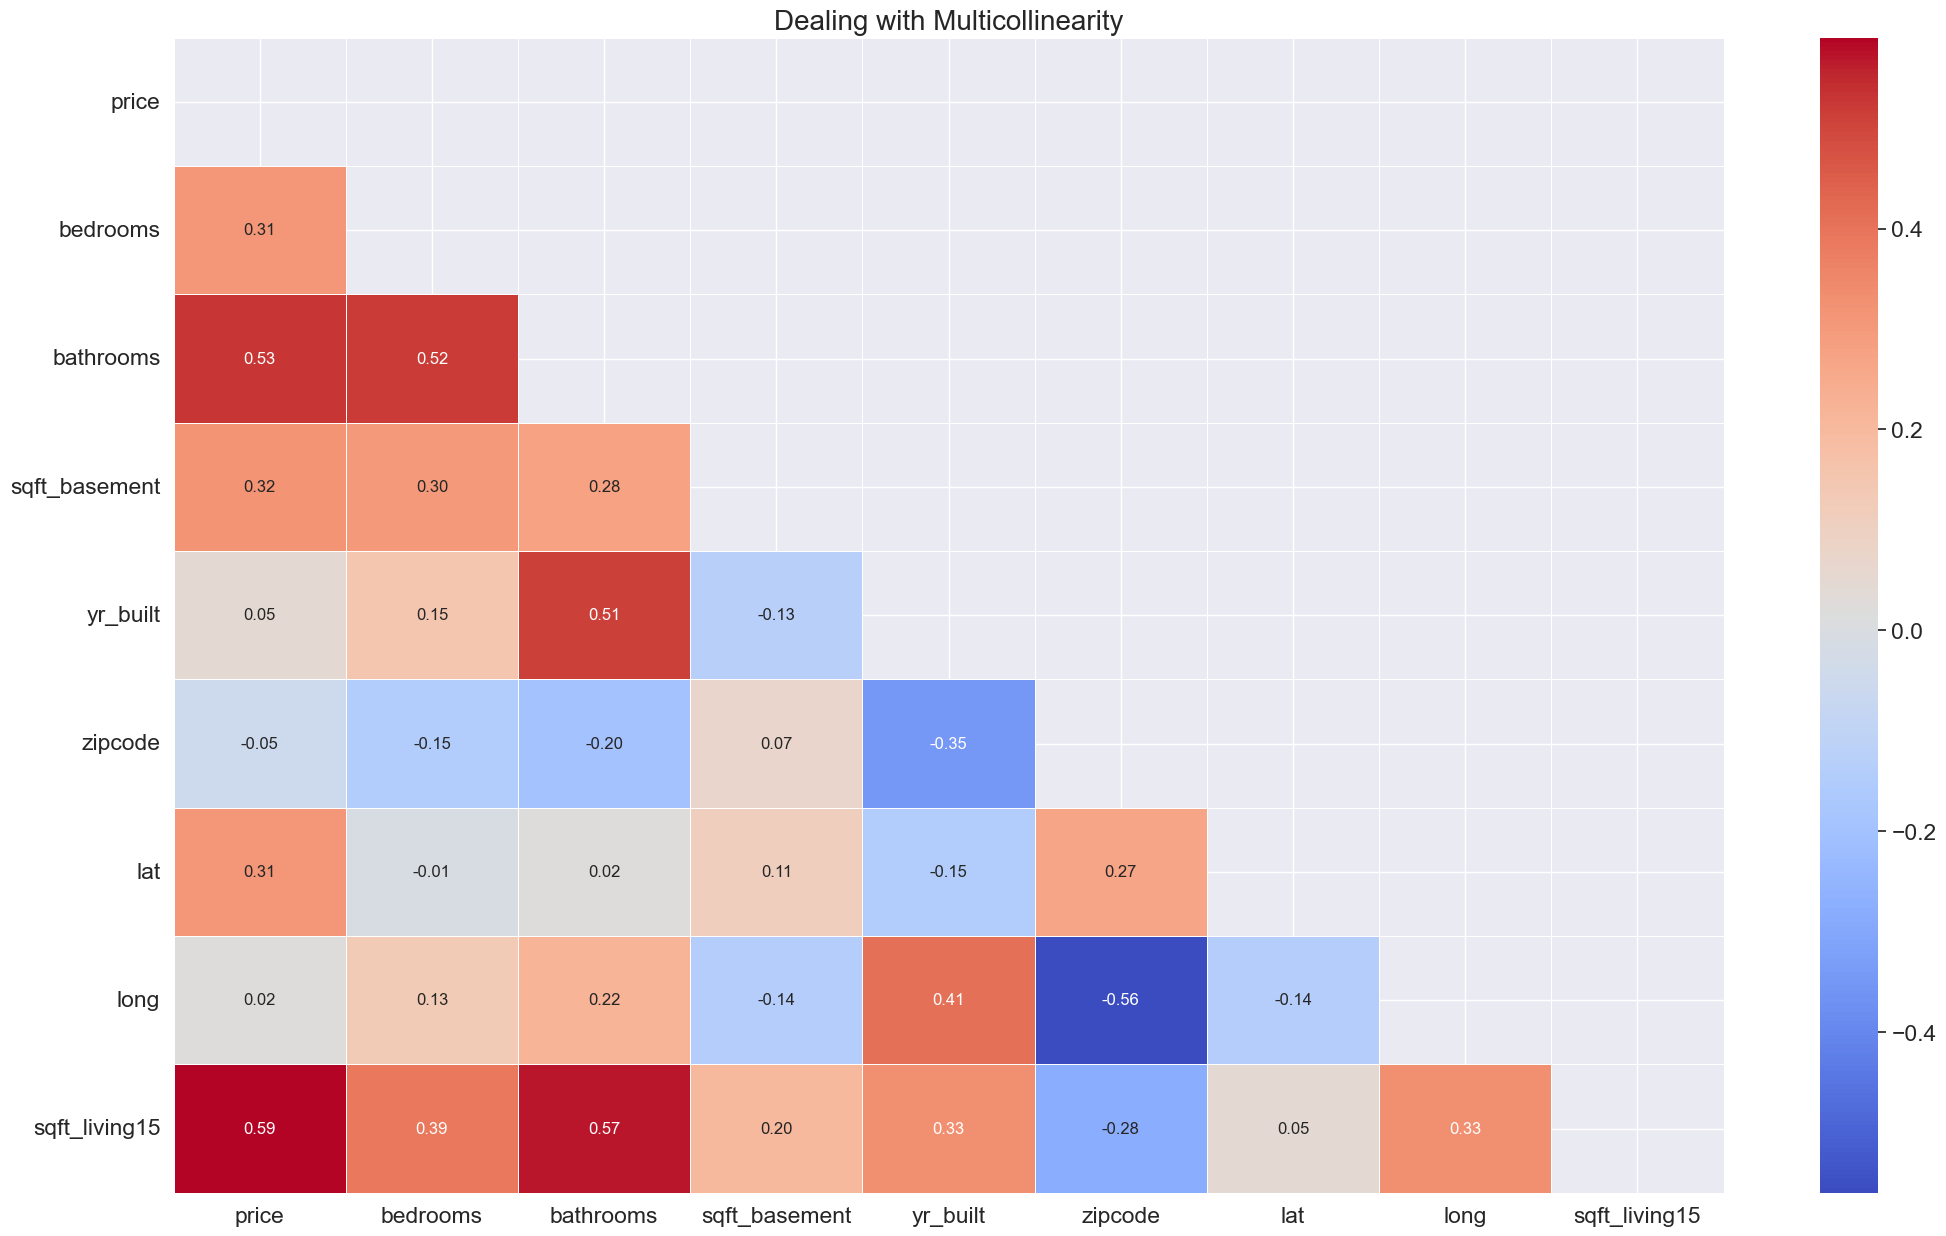

In [59]:
# Checking Multicollinearity
num_corr = round(df3.corr(), 2)

# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

- df = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']
- df1 = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15']
- df2 = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'sqft_living15']

- df3 = ['price', 'bedrooms', 'bathrooms', 'sqft_basement', 'yr_built',
       'zipcode', 'lat', 'long', 'sqft_living15']


In [54]:
df3.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_basement', 'yr_built',
       'zipcode', 'lat', 'long', 'sqft_living15'],
      dtype='object')

In [52]:
LG_results_df

,R²,RMSE,MSE,MAE
Scenario,,,,
df,0.7012,212539.5166,4.517305e+10,127493.3421
df1,0.6200,239674.4929,5.744386e+10,145832.3577
df2,0.5564,258961.4508,6.706103e+10,163929.5026
df3,0.5268,267454.1528,7.153172e+10,159405.7651
df with standardscaler,0.7012,212539.5166,4.517305e+10,127493.3421
df1 with standardscaler,0.6191,234502.6095,5.499147e+10,144577.0883
df2 with standardscaler,0.5564,234502.6095,5.499147e+10,144577.0883
df3 with standardscaler,0.5268,267454.1528,7.153172e+10,159405.7651
df with Log Transform,0.6346,235041.0657,5.524430e+10,136175.8431


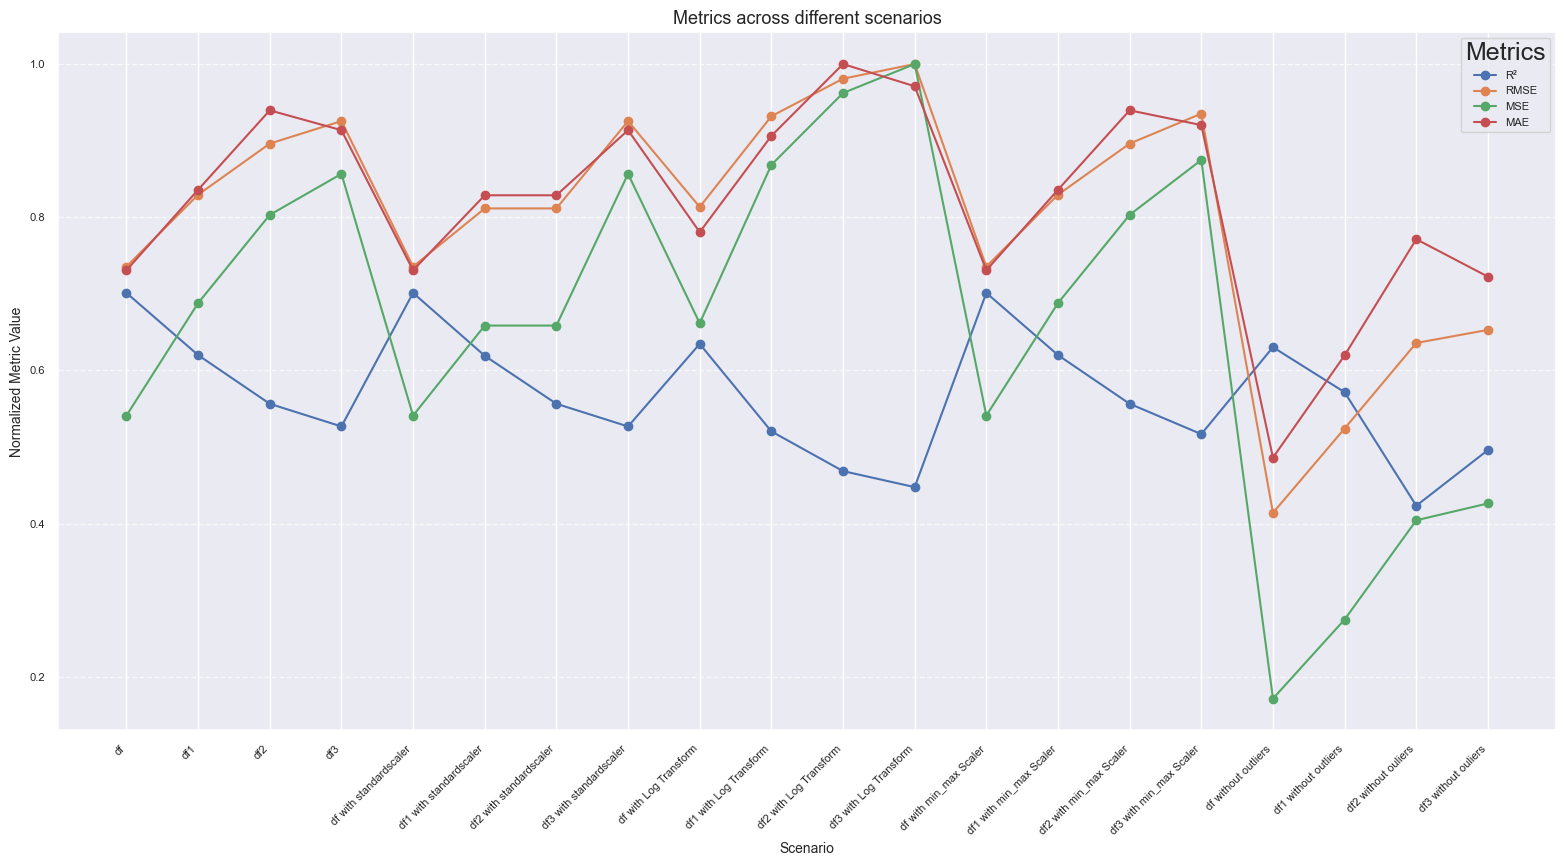

In [56]:
df_normalized = LG_results_df.copy()
for col in ["RMSE", "MSE", "MAE"]:
    df_normalized[col] = LG_results_df[col] / LG_results_df[col].max()

# Plot line graph
plt.figure(figsize=(16, 9))
for column in df_normalized.columns:
    plt.plot(df_normalized.index, df_normalized[column], marker='o', label=column)

# Add titles and labels
plt.title("Metrics across different scenarios", fontsize=13)
plt.ylabel("Normalized Metric Value", fontsize=10)
plt.xlabel("Scenario", fontsize=10)
plt.xticks(fontsize=8, rotation=45, ha='right')
plt.yticks(fontsize=8)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.legend(title="Metrics", fontsize=8)
plt.tight_layout()

# Show plot
plt.show()

<h2 style="color: Blue;">EDA</h2>

In [174]:
df1

,price,bedrooms,bathrooms,sqft_living,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15
date_format,,,,,,,,,,,
2014-10-13,221900.0,3,1.00,1180,1180,0,1955,98178,47.5112,-122.257,1340
2014-12-09,538000.0,3,2.25,2570,2170,400,1951,98125,47.7210,-122.319,1690
2015-02-25,180000.0,2,1.00,770,770,0,1933,98028,47.7379,-122.233,2720
2014-12-09,604000.0,4,3.00,1960,1050,910,1965,98136,47.5208,-122.393,1360
2015-02-18,510000.0,3,2.00,1680,1680,0,1987,98074,47.6168,-122.045,1800
...,...,...,...,...,...,...,...,...,...,...,...
2014-05-21,360000.0,3,2.50,1530,1530,0,2009,98103,47.6993,-122.346,1530
2015-02-23,400000.0,4,2.50,2310,2310,0,2014,98146,47.5107,-122.362,1830
2014-06-23,402101.0,2,0.75,1020,1020,0,2009,98144,47.5944,-122.299,1020


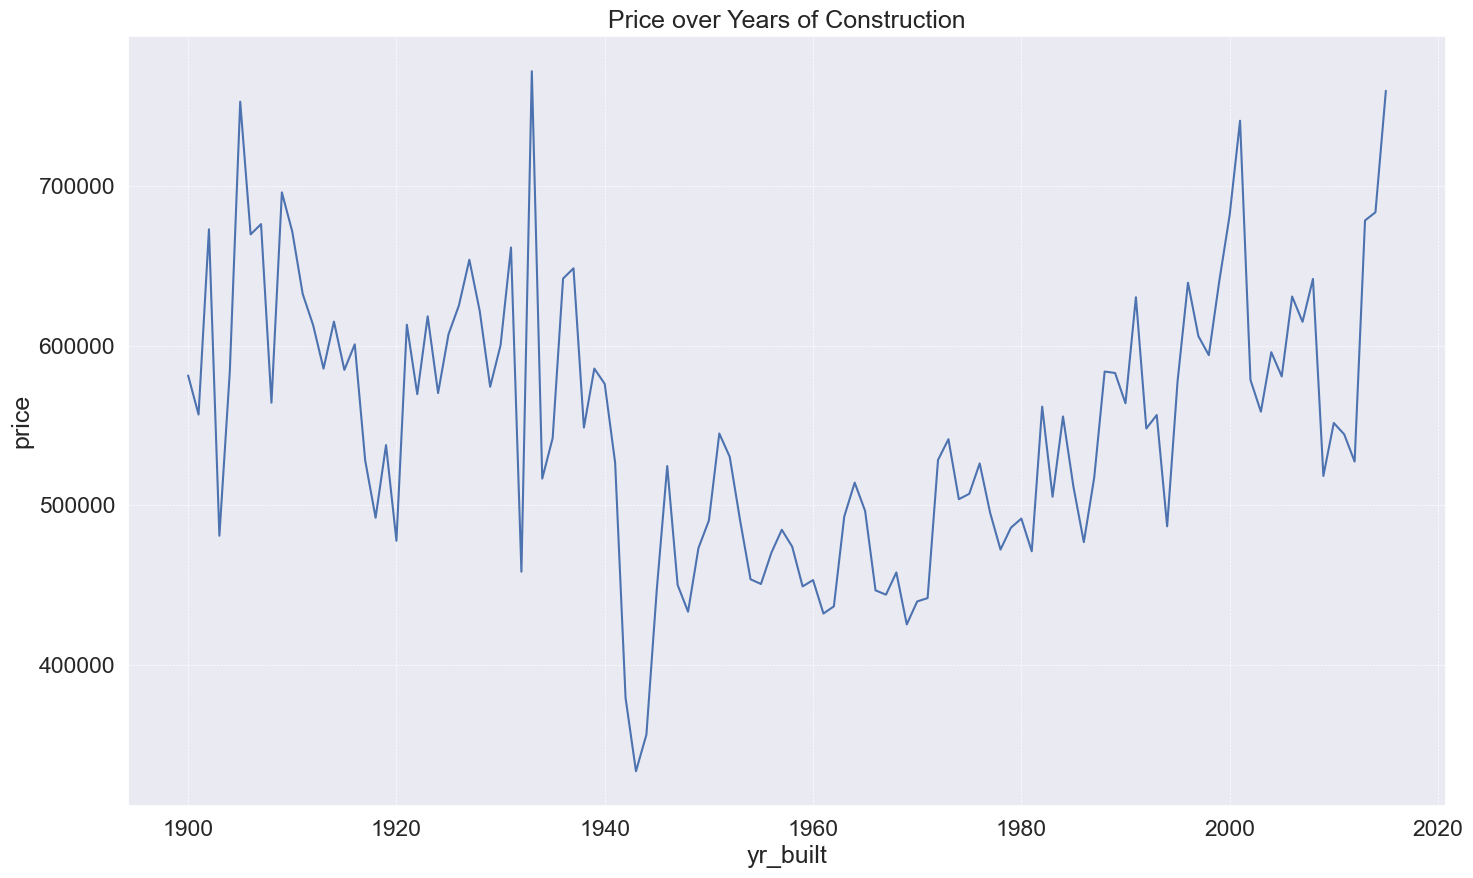

In [62]:
# Plotting a line graph to visualize the trend of average 'price' across different 'yr_built'
plt.figure(figsize=(17,10))
sns.lineplot(data=df2, x='yr_built', y='price', ci=None)
plt.title('Price over Years of Construction')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

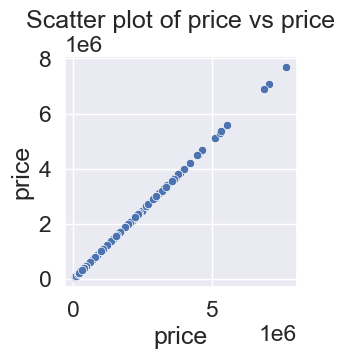

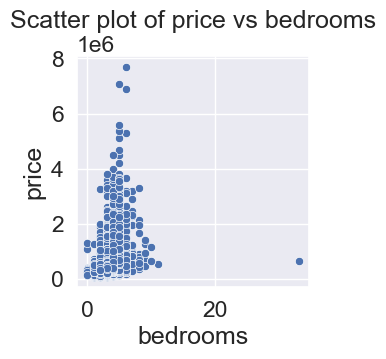

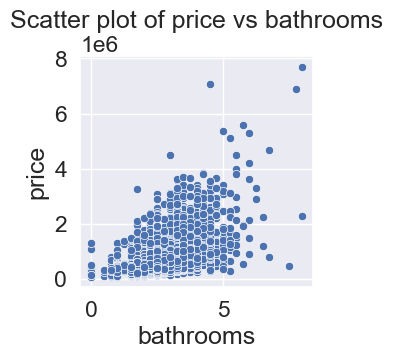

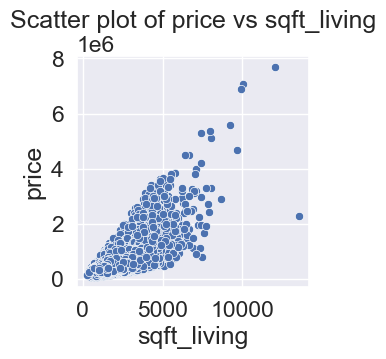

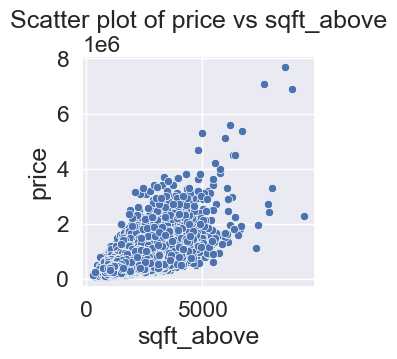

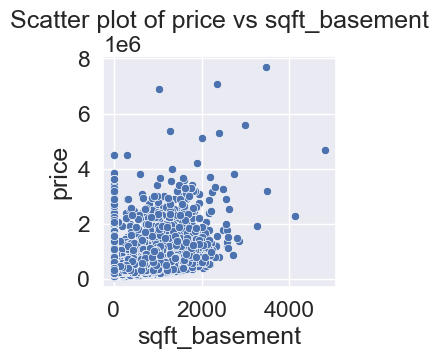

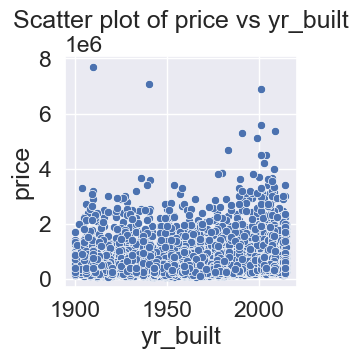

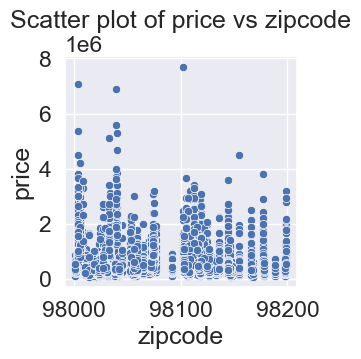

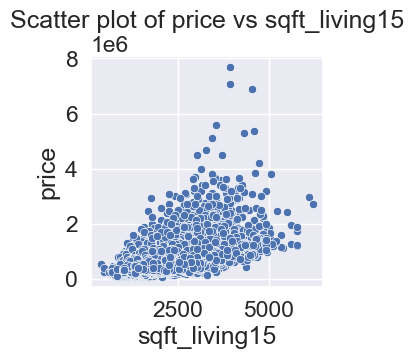

In [63]:
# Plotting scatter plots for each numerical column against 'price' to visualize their relationships
for col in df2.columns:
    plt.figure(figsize=(3, 3))
    plt.title('Scatter plot of price vs ' + col)
    sns.scatterplot(data=df1, x=col, y='price')
    plt.show()

In [81]:
df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
date_format,,,,,,,,,,,,,,,,,,,
2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [82]:
df1.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15
date_format,,,,,,,,,,,
2014-10-13,221900.0,3,1.00,1180,1180,0,1955,98178,47.5112,-122.257,1340
2014-12-09,538000.0,3,2.25,2570,2170,400,1951,98125,47.7210,-122.319,1690
2015-02-25,180000.0,2,1.00,770,770,0,1933,98028,47.7379,-122.233,2720
2014-12-09,604000.0,4,3.00,1960,1050,910,1965,98136,47.5208,-122.393,1360
2015-02-18,510000.0,3,2.00,1680,1680,0,1987,98074,47.6168,-122.045,1800


In [83]:
df2.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15
date_format,,,,,,,,,
2014-10-13,221900.0,3,1.00,1180,1180,0,1955,98178,1340
2014-12-09,538000.0,3,2.25,2570,2170,400,1951,98125,1690
2015-02-25,180000.0,2,1.00,770,770,0,1933,98028,2720
2014-12-09,604000.0,4,3.00,1960,1050,910,1965,98136,1360
2015-02-18,510000.0,3,2.00,1680,1680,0,1987,98074,1800


In [85]:
print(df.shape)
print(df1.shape)
print(df2.shape)

(21613, 19)
(21613, 11)
(21613, 9)


In [86]:
df_no_outliers = outliers_dealing_target(df, target_column='price')
df_no_outliers1 = outliers_dealing_target(df1, target_column='price')
df_no_outliers2 = outliers_dealing_target(df2, target_column='price')

In [87]:
print(df_no_outliers.shape)
print(df_no_outliers1.shape)
print(df_no_outliers2.shape)

(13972, 19)
(18973, 11)
(19222, 9)


In [90]:
# CSV files
df1 = df1.to_csv('df1.csv')
df2 = df2.to_csv('df2.csv')

In [ ]:
df_no_outliers1 = df_no_outliers1.to_csv('df_no_outliers1.csv')
df_no_outliers2 = df_no_outliers2.to_csv('df_no_outliers2.csv')